# Exploratory Data Analysis

Some introduction...

## Dataset Descriptions

### Streams
The Streams dataset provides details about the different streams in the system. It includes information such as stream ID, stream name, and stream category.

### Post Reports
This dataset contains reports of posts made by users. It includes attributes such as post ID, user ID, report reason, and timestamp.

### Comments Reports
The Comments Reports dataset contains reports of comments made by users. It includes attributes such as comment ID, user ID, report reason, and timestamp.

### User Activity
The User Activity dataset captures the activity logs of users in the system. It includes attributes such as user ID, activity type, timestamp, and the normalized path of the activity.


## 1. Initial setup 

In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Needed Packages
import pandas as pd
import os
import numpy as np
from datetime import datetime
#from pandas_profiling import ProfileReport
#import ydata_profiling



# Visualization packages
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# Display settings
import warnings
warnings.filterwarnings('ignore')
#%matplotlib widget

# Operating system setup
WINDOWS_ACTIVATOR = False
if WINDOWS_ACTIVATOR == True:
    BASE_PATH = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper"
else:
    BASE_PATH = "/home/ubuntu/thesis_GenAI"

print(BASE_PATH)

/home/ubuntu/thesis_GenAI


## 2. EDA for 'users' data set

This dataset contains information about the users in the system. It includes attributes such as user ID, name, age, and gender.

In [15]:
# Users data
#path = "data\\production_datasets\\FlaggerForce\\users_export"
path_rel = "/data/production_datasets/FlaggerForce/users_export"
path = os.path.join(BASE_PATH,path_rel)
print(BASE_PATH)
print(path)

file_name = "flaggerforce_users_2024-03-05T23-44-35.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
# data.sample(2)

/home/ubuntu/thesis_GenAI
/data/production_datasets/FlaggerForce/users_export


FileNotFoundError: [Errno 2] No such file or directory: '/data/production_datasets/FlaggerForce/users_export/flaggerforce_users_2024-03-05T23-44-35.xlsx'

state
suspended    15171
active        2095
created         37
Name: count, dtype: int64


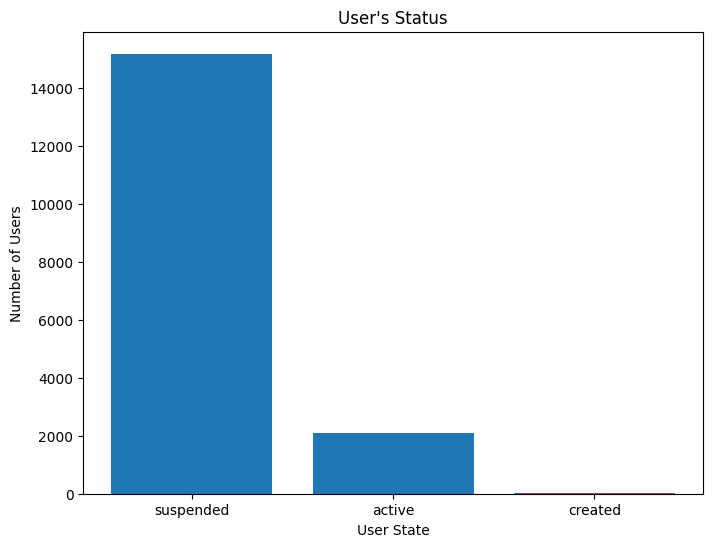

In [4]:
# Active Users by Department
data_users = data.copy()
# group by state 
print(data_users['state'].value_counts())

import matplotlib.pyplot as plt

# Active Users by Department
data_users = data.copy()
state_counts = data_users['state'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(state_counts.index, state_counts.values)
plt.xlabel('User State')
plt.ylabel('Number of Users')
plt.title("User's Status")
plt.show()


In [5]:
data_users[data_users['id'] == "973511e1-3b2d-4ec6-87b3-7780269d3843"]

,first_login,suspended,id,last_skipped_contact_details,is_bot,state,role,last_login,tenantuserid,updated,used,display_name_extension,suspended_at,username,language,created,department,location,position
7945,2021-12-20T19:58:53,True,973511e1-3b2d-4ec6-87b3-7780269d3843,2021-12-20T19:59:21,False,suspended,member,2021-12-20T19:58:53,20982,2022-02-12T12:00:46,2022-02-11T20:44:00,"Crew Member, WPA",2022-02-12T12:00:46,Hunter_Norris,en,2021-12-20T18:02:17,Operations,WPA,Crew Member


In [6]:
data_users.head()

,first_login,suspended,id,last_skipped_contact_details,is_bot,state,role,last_login,tenantuserid,updated,used,display_name_extension,suspended_at,username,language,created,department,location,position
0,2022-12-16T19:26:22,False,093c7a08-e32c-40eb-9eb6-a5e26c623be0,2024-02-05T21:31:03,False,active,member,2024-02-05T21:31:00,24193,2024-02-05T21:31:00,2024-03-05T22:26:00,"Advanced Crew Leader, MD",NaN,Aaron_Burch,en,2022-12-16T18:02:51,Operations,MD,Advanced Crew Leader
1,2024-02-20T21:19:59,False,c9c1ce3b-2afa-453d-9c72-b521442b288f,2024-02-20T21:20:18,False,active,member,2024-02-20T21:19:59,28629,2024-02-21T03:01:52,2024-03-05T19:28:00,"Crew Member, NEPA",NaN,Aaron_Cassatt,en,2024-02-20T20:01:20,Operations,NEPA,Crew Member
2,2023-12-11T20:19:18,False,eae780a3-9c68-457b-ad3f-c38210a46539,2023-12-11T20:20:07,False,active,member,2023-12-11T20:19:18,27878,2024-02-26T22:01:04,2024-03-05T22:24:00,"Crew Leader, WNC",NaN,Aaron_Ervin,en,2023-12-11T18:02:40,Operations,WNC,Crew Leader
3,2023-07-24T19:06:39,False,a7bb6f33-fec7-41a7-9ebf-22479dbcb747,2023-07-24T19:07:07,False,active,member,2023-07-24T19:06:39,26527,2024-02-27T11:35:40,2024-03-05T00:41:00,"Crew Leader, WNC",NaN,Aaron_Hunter,en,2023-07-24T16:04:41,Operations,WNC,Crew Leader
4,NaN,False,9037024c-c0ab-4332-be54-4774d32b6e78,NaN,False,created,member,NaN,NaN,2024-02-19T21:15:25,NaN,NaN,NaN,aaron_johnson1,NaN,2024-02-19T21:14:59,NaN,NaN,NaN


In [7]:
# Preprocessing users data function

def preprocess_users(df):  
    # Keep only active and suspended users
    df = df[df['state'] != 'created']
  
    # Imputation of missing values
    # Language 
    df['language'].fillna('en', inplace=True)
    # Exclude rows with missing values in the column first_login
    df = df[~df['first_login'].isnull()]

    # Delete columns
    # Columns to be deleted
    cols_to_delete = ['is_bot','tenantuserid']    
    df.drop(cols_to_delete, axis=1, inplace=True)
    # Reorder columns
    new_order = ['first_login', 'suspended', 'username', 'id', 'last_skipped_contact_details',
                'state', 'role', 'last_login', 'updated', 'used', 'display_name_extension',
                'suspended_at', 'language', 'created', 'department', 'location', 'position']
    df = df[new_order]
    
    # Convert to datetime
    df['first_login'] = pd.to_datetime(df['first_login'])
    df['last_skipped_contact_details'] = pd.to_datetime(df['last_skipped_contact_details'])
    df['last_login'] = pd.to_datetime(df['last_login'])
    df['updated'] = pd.to_datetime(df['updated'])
    df['used'] = pd.to_datetime(df['used'])
    df['created'] = pd.to_datetime(df['created'])    

    # date range of posts
    print("The date range of users based on the creation date:")
    print(f"Min date: {df['created'].min()}")
    print(f"Max date: {df['created'].max()}")
    #print(f"Date range: {df['created'].max() - df['created'].min()}")
    
    
    return df

df_users = preprocess_users(data_users)

The date range of users based on the creation date:
Min date: 2017-12-20 04:30:24
Max date: 2024-03-05 20:01:54


In [8]:
# print the rows containing missing values
# df_users[df_users.isnull().any(axis=1)]

# Check missing values
df_nans =  df_users.isnull().sum()  

fig = px.bar(df_nans,             
             y=df_nans.values,
             x=df_nans.index,             
             title='Missing Values',
             height=600,
             width=800,)
fig.show()

In [9]:
# Active Users by Position
# Active users
df_users_active = df_users[df_users['state'] == 'active']

# Group by display_name_extension
print(f"The number of unique positions names is {df_users_active['display_name_extension'].nunique()}")
position_size = df_users_active.groupby('display_name_extension')['state'].value_counts().unstack().fillna(0).sort_values('active', ascending=False).head(10)
#print(position_size.sample(10))

# Plotting
fig = px.bar(position_size,              
             x='active',            
             title='Top10 Active Users by Position',
             height=400
             )

# Update layout
fig.update_layout(barmode='stack')

fig.show()

The number of unique positions names is 239


The number of unique positions names is 239


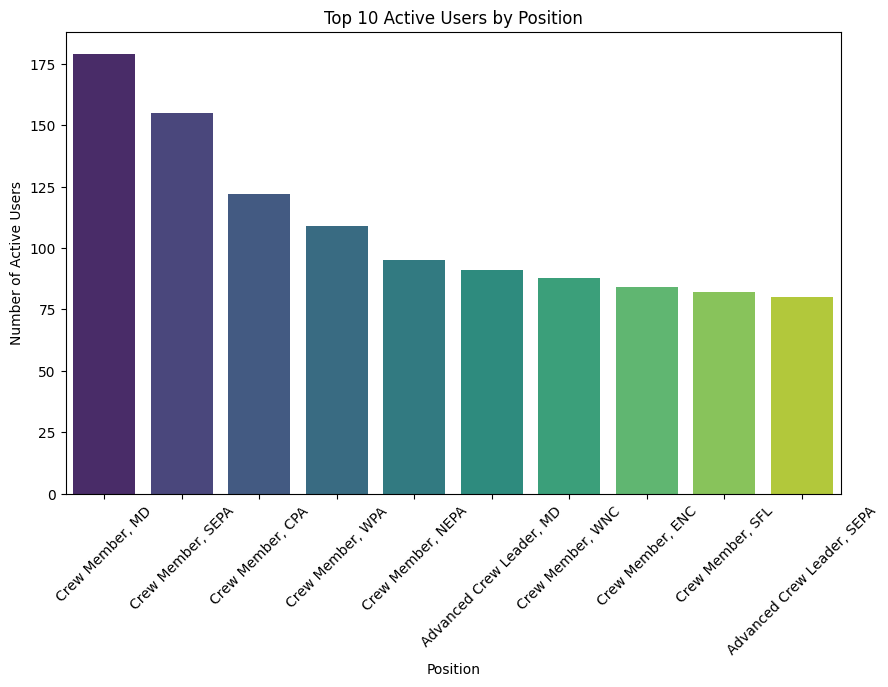

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_users is your DataFrame and it has been loaded correctly

# Filter out only active users
df_users_active = df_users[df_users['state'] == 'active']

# Display number of unique position names
print(f"The number of unique positions names is {df_users_active['display_name_extension'].nunique()}")

# Group by position and count active users, then sort and get the top 10
position_size = df_users_active.groupby('display_name_extension').size().reset_index(name='counts')
top_positions = position_size.sort_values(by='counts', ascending=False).head(10)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='display_name_extension', y='counts', data=top_positions, palette='viridis')
plt.title('Top 10 Active Users by Position')
plt.xlabel('Position')
plt.ylabel('Number of Active Users')
plt.xticks(rotation=45)  # Rotate the position names for better visibility if necessary

# Show the plot
plt.show()


In [111]:
# Active users proportions by department
operations_percent = df_users_active['department'].value_counts(normalize=True).mul(100).round(2).sort_values(ascending=False)
print("Proportion of Active Users by Department:")
print(operations_percent)

Proportion of Active Users by Department:
department
Operations                94.04
Finance                    1.01
Risk                       0.67
Field Operations           0.58
Marketing                  0.43
Warehouse                  0.38
Business Development       0.38
Human Resources            0.34
HR                         0.34
Technology                 0.34
Risk & Safety              0.29
Training                   0.24
Client Services            0.24
Employee Services          0.19
Information Technology     0.10
Safety                     0.10
Analytics                  0.10
Asset Management           0.05
OSC                        0.05
Facilities                 0.05
operations                 0.05
Resource Allocation        0.05
Name: proportion, dtype: float64


In [112]:
# Export users data for further analysis
# Save the data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\cleaned_datasets"
file_name = "users_cleaned.csv"
file_path = os.path.join(path, file_name)
df_users.to_csv(file_path, index=False)

## 3. EDA for 'streams' data set

In [27]:
# Streams data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\BKPR_Datasets_Samples"
file_name = "streams.xlsx"
file_path = os.path.join(path, file_name)
data = pd.read_excel(file_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   13 non-null     object
 1   stream_name  13 non-null     object
 2   stream_path  13 non-null     object
 3   stream_id    13 non-null     int64 
 4   org_unit_id  4 non-null      object
 5   hidden       13 non-null     bool  
 6   description  13 non-null     object
dtypes: bool(1), int64(1), object(5)
memory usage: 769.0+ bytes
None


,created_at,stream_name,stream_path,stream_id,org_unit_id,hidden,description
0,2018-04-13T13:32:05,Water Break,waterbreak,6787,NaN,False,Share your thoughts and experiences to help us...
1,2018-06-11T19:09:41,Training,training,7981,NaN,True,The Official Stream for Training Info
2,2020-01-15T13:09:24,The Whiteboard,thewhiteboard,22706,89949fce-efd6-4d59-a214-e7164f2c9c9e,False,Connect with coworkers from the corporate camp...
3,2018-04-27T14:50:23,Test Stream,teststream,6943,NaN,False,For Testing Posts Before Going Live
4,2018-01-18T20:52:37,Safety & Operations,safetyoperations,5745,NaN,False,Join weekly conversations led by our Safety an...


In [29]:
# Active Streams
df_streams_raw = data.copy()

# Define a function to preprocess streams data

def preprocess_streams(data):    
    # Date to datetime
    data['created_at'] = pd.to_datetime(data['created_at'])
    
    # Keep active streams
    data = data[data['hidden'] == False]
    data.drop('org_unit_id', axis=1, inplace=True)  
    # reset index
    data.reset_index(drop=True, inplace=True)   
     
    return data

df_streams = preprocess_streams(df_streams_raw)
df_streams

,created_at,stream_name,stream_path,stream_id,hidden,description
0,2018-04-13 13:32:05,Water Break,waterbreak,6787,False,Share your thoughts and experiences to help us...
1,2020-01-15 13:09:24,The Whiteboard,thewhiteboard,22706,False,Connect with coworkers from the corporate camp...
2,2018-04-27 14:50:23,Test Stream,teststream,6943,False,For Testing Posts Before Going Live
3,2018-01-18 20:52:37,Safety & Operations,safetyoperations,5745,False,Join weekly conversations led by our Safety an...
4,2020-01-15 13:31:43,"OSC, We Can Help",oscwecanhelp,22708,False,"Post your questions about payroll, HR, technol..."
5,2018-08-01 12:57:09,Jobs,jobs,9254,False,Utilize this stream to view open jobs. Comment...
6,2017-12-20 04:30:23,Flagger Force Connect,general,5476,False,"The company ""bulletin board"" and important upd..."


In [31]:
# Export streams data for further analysis
# Save the data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\cleaned_datasets"
file_name = "streams_cleaned.csv"
file_path = os.path.join(path, file_name)
df_streams.to_csv(file_path, index=False)

## 4. EDA for 'posts' data set

In [114]:
# Streams data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\FlaggerForce\\StreamContent"
file_name = "historical_posts_2022_Feb2024.csv"
file_path = os.path.join(path, file_name)
data = pd.read_csv(file_path)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42882 entries, 0 to 42881
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stream_name     42882 non-null  object
 1   stream_id       42882 non-null  int64 
 2   post_id         42882 non-null  int64 
 3   poster          42881 non-null  object
 4   action          42882 non-null  object
 5   created         42882 non-null  object
 6   title           36070 non-null  object
 7   text            41829 non-null  object
 8   like_count      42882 non-null  int64 
 9   comment_countt  42882 non-null  int64 
 10  mentions        5830 non-null   object
 11  labels          6722 non-null   object
dtypes: int64(4), object(8)
memory usage: 3.9+ MB
None


,stream_name,stream_id,post_id,poster,action,created,title,text,like_count,comment_countt,mentions,labels
0,Jobs,9254,7615837,Lisa_Muegge,POSTED,2024-03-05T14:57:18,Cm Available anytime!,WNC CM available!,0,0,NaN,NaN
1,"OSC, We Can Help",22708,7615091,Linsey_McGregor,POSTED,2024-03-05T12:39:48,Report,I'm reporting a serious matter I'm done with t...,2,2,NaN,NaN
2,Jobs,9254,7615025,client_services_am,POSTED,2024-03-05T12:32:24,OPEN JOBS - NOVA - 2 CM,1 CM\nClient: Washington Gas\nDate: 3/5/24\nAd...,3,1,NaN,NaN
3,Water Break,6787,7610693,FlaggerForce,POSTED,2024-03-05T12:25:23,Week 9 of Our 2024 In-Field Promotions | Congr...,"Congratulations, CLs, ACLs, and other new prom...",6,4,"Rizear_Law,Joe_Hall,Leon_Witherspoon,Virginia_...",NaN
4,Jobs,9254,7614975,Justin_House,POSTED,2024-03-05T12:08:57,NaN,Available for emergencies…NOVA 🚨🏮🚥💦☔️❄️🤤👷🏾,4,0,NaN,NaN


In [115]:
# print the rows where the text and title are missing
data[data['text'].isnull() & data['title'].isnull()]

,stream_name,stream_id,post_id,poster,action,created,title,text,like_count,comment_countt,mentions,labels
84,Water Break,6787,7607722,Laura_Land,POSTED,2024-03-03T15:21:31,NaN,NaN,3,0,NaN,NaN
181,Water Break,6787,7600011,Anthony_Ingao,POSTED,2024-03-01T11:53:46,NaN,NaN,1,0,NaN,NaN
692,Water Break,6787,7557309,Vera_Rivera,POSTED,2024-02-19T14:18:05,NaN,NaN,3,0,NaN,NaN
1259,Safety & Operations,5745,7515525,Cody_Carey,POSTED,2024-02-07T13:48:29,NaN,NaN,14,0,NaN,NaN
1596,Water Break,6787,7490996,Tracey_Worley,POSTED,2024-01-31T18:03:12,NaN,NaN,28,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42575,Water Break,6787,4941279,Charles_Linn,POSTED,2022-01-07T12:31:40,NaN,NaN,3,0,NaN,NaN
42603,Water Break,6787,4939886,Samuel_Wirtz,POSTED,2022-01-06T21:23:11,NaN,NaN,8,4,NaN,NaN
42637,Water Break,6787,4938018,Charles_Linn,POSTED,2022-01-06T12:47:58,NaN,NaN,2,0,NaN,NaN
42682,Water Break,6787,4934808,Charles_Linn,POSTED,2022-01-05T12:54:45,NaN,NaN,5,3,NaN,NaN


In [118]:
# Function to preprocess the data
df_posts = data.copy()

def post_preprocess(posts, df_users):
    # Change the date format
    posts['created'] = pd.to_datetime(posts['created'], format='ISO8601')    
    # Delete the rows where title and text are missing
    posts = posts[~(posts['text'].isnull() & posts['title'].isnull())]       

    # date range of posts
    print("The date range of posts is:")
    print(f"Min date: {posts['created'].min()}")
    print(f"Max date: {posts['created'].max()}")
    print(f"Date range: {posts['created'].max() - posts['created'].min()}")
    
    
    # Add a new column with the state from df_users_active, connecting 'id' with 'Author User ID'
    df = posts.merge(df_users[['username', 'id','position','state']], left_on='poster', right_on='username', how='left')
    # Delete username columns
    df.drop(['poster'], axis=1, inplace=True)
    # Rename poster columns
    df.rename(columns={'id':'author_user_id','position':'author_position','state':'author_status'}, inplace=True)
    # Reorder columns
    new_order = ['stream_name', 'stream_id', 'post_id', 'action', 'created',                                  
                'title', 'text', 'like_count', 'comment_countt', 'mentions', 'labels',
                'username', 'author_user_id', 'author_position', 'author_status']
    df = df[new_order]
    
    return df
    
    
df_post_user = post_preprocess(df_posts,df_users)
print(df_post_user.shape)
df_post_user.head()


The date range of posts is:
Min date: 2022-01-01 00:55:41
Max date: 2024-03-05 14:57:18
Date range: 794 days 14:01:37
(42654, 15)


,stream_name,stream_id,post_id,action,created,title,text,like_count,comment_countt,mentions,labels,username,author_user_id,author_position,author_status
0,Jobs,9254,7615837,POSTED,2024-03-05 14:57:18,Cm Available anytime!,WNC CM available!,0,0,NaN,NaN,Lisa_Muegge,d52d678b-df08-4b69-9454-06ce860e0206,Crew Member,active
1,"OSC, We Can Help",22708,7615091,POSTED,2024-03-05 12:39:48,Report,I'm reporting a serious matter I'm done with t...,2,2,NaN,NaN,Linsey_McGregor,8db5cc91-01fa-40bb-bbd0-218846cf229a,Advanced Crew Leader,active
2,Jobs,9254,7615025,POSTED,2024-03-05 12:32:24,OPEN JOBS - NOVA - 2 CM,1 CM\nClient: Washington Gas\nDate: 3/5/24\nAd...,3,1,NaN,NaN,client_services_am,af09ca5c-59cd-427c-96be-9bc49f613b28,NaN,active
3,Water Break,6787,7610693,POSTED,2024-03-05 12:25:23,Week 9 of Our 2024 In-Field Promotions | Congr...,"Congratulations, CLs, ACLs, and other new prom...",6,4,"Rizear_Law,Joe_Hall,Leon_Witherspoon,Virginia_...",NaN,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active
4,Jobs,9254,7614975,POSTED,2024-03-05 12:08:57,NaN,Available for emergencies…NOVA 🚨🏮🚥💦☔️❄️🤤👷🏾,4,0,NaN,NaN,Justin_House,5c1223af-c738-498b-84d6-455a9080c914,Crew Leader,active


In [119]:
# Distribution of posts by stream
#posts_by_stream = df_post_user['stream_name'].value_counts()
posts_by_stream = df_post_user.groupby('stream_name')['post_id'].size().sort_values(ascending=False)
# add a column with the percentage of posts by stream
posts_by_stream = posts_by_stream.to_frame().reset_index()
posts_by_stream.columns = ['stream_name', 'posts']
posts_by_stream['Percentage'] = round(posts_by_stream['posts'] / posts_by_stream['posts'].sum() * 100,1)
print(posts_by_stream)

# Sort the posts_by_stream DataFrame in descending order
posts_by_stream = posts_by_stream.sort_values('posts', ascending=True)
# Plotting
fig = px.bar(posts_by_stream,              
             x='posts',
             y='stream_name',             
             title='Posts by stream_name',
             height=600,
             width=1000            
            )

# Update the layout
fig.update_layout(xaxis_title='Number of Posts',
                  yaxis_title='stream_name',
                  title_x=0.5,
                  title_font_size=20)

fig.show()

             stream_name  posts  Percentage
0                   Jobs  27375        64.2
1            Water Break   7532        17.7
2    Safety & Operations   3547         8.3
3       OSC, We Can Help   2797         6.6
4         The Whiteboard    501         1.2
5           Test Stream     455         1.1
6  Flagger Force Connect    411         1.0
7             FFWRX TEST     36         0.1


In [120]:
# Find the most popular posts
# Group by post_id
df_popular_post = df_post_user.groupby(['post_id','title','like_count']).size().reset_index(name='count')

# Delete column count
df_popular_post.drop('count', axis=1, inplace=True)
df_popular_post.sort_values('like_count', ascending=False).head(10)

,post_id,title,like_count
24239,6714760,Danny Rice - Words cannot express my gratitude!,91
34503,7482280,A Safety Announcement (1.29.2024),75
29667,7142545,Celebrating a decade of service to others - Ch...,69
6095,5319511,"Celebrating 10 years of Dedication, Growth & C...",64
27891,6996657,Safety Announcement,60
1734,5034038,1st in Flagger Force - History - Ron Brooks - ...,60
14642,5980180,Happy 5th Anniversary - Tamara... AND ITZ!,60
32440,7358600,Celebrating an unsung hero of the OSC - Seth L...,59
29026,7083413,Celebrating 5 years of Paula Rosen supporting ...,59
4460,5221695,The Donna Hoffer Story,57


In [125]:
len(df_post_user['post_id'].unique())

42654

In [122]:
df_post_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42654 entries, 0 to 42653
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   stream_name      42654 non-null  object        
 1   stream_id        42654 non-null  int64         
 2   post_id          42654 non-null  int64         
 3   action           42654 non-null  object        
 4   created          42654 non-null  datetime64[ns]
 5   title            36070 non-null  object        
 6   text             41829 non-null  object        
 7   like_count       42654 non-null  int64         
 8   comment_countt   42654 non-null  int64         
 9   mentions         5830 non-null   object        
 10  labels           6716 non-null   object        
 11  username         42653 non-null  object        
 12  author_user_id   42653 non-null  object        
 13  author_position  34810 non-null  object        
 14  author_status    42653 non-null  objec

In [121]:
# Export users data for further analysis
# Save the data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\cleaned_datasets"
file_name = "posts_cleaned.csv"
file_path = os.path.join(path, file_name)
df_post_user.to_csv(file_path, index=False)

## 5. EDA for 'comments' data set

In [91]:
# Users data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\FlaggerForce\\StreamContent"
file_name = "historical_comments_2022_2024Feb.csv"
file_path = os.path.join(path, file_name)
data = pd.read_csv(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140037 entries, 0 to 140036
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   stream_name   140037 non-null  object
 1   created_date  140037 non-null  object
 2   post_id       140037 non-null  int64 
 3   comment_id    140037 non-null  int64 
 4   username      140037 non-null  object
 5   comment_text  140035 non-null  object
 6   like_count    140037 non-null  int64 
 7   report_count  140037 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.5+ MB
None


,stream_name,created_date,post_id,comment_id,username,comment_text,like_count,report_count
0,Water Break,2024-03-05T15:15:55,7612625,6866587,FlaggerForce,Congratulations and a great addition to the te...,0,0
1,Water Break,2024-03-05T15:10:47,7612663,6866567,FlaggerForce,"Hello team, remember to have safety discussion...",0,0
2,Water Break,2024-03-05T15:08:29,7613861,6866561,FlaggerForce,"@Larry_Broderick, both our moderation team and...",0,0
3,Safety & Operations,2024-03-05T15:04:42,7613237,6866545,FlaggerForce,"@William_Pulliam, we appreciate you being prou...",0,0
4,Safety & Operations,2024-03-05T15:02:47,7613255,6866539,FlaggerForce,"We appreciate you supporting @Dennis_Cumbie, @...",0,0


In [96]:
# print the rows where the text and title are missing
data[data['comment_text'].isnull()]

,stream_name,created_date,post_id,comment_id,username,comment_text,like_count,report_count
4811,Jobs,2024-02-03T17:41:11,7503907,6744767,David_Harrison,NaN,0,0
122638,Jobs,2022-04-06T12:22:24,5206040,4192982,Tiffany_Silver,NaN,0,1


In [100]:
# Function to preprocess the data
df_comments = data.copy()

def preprocess_post(df, df_users):
    # Change the date format
    df['created_date'] = pd.to_datetime(df['created_date'], format='ISO8601')
    # Delete the rows where text is missing
    df = df[~df['comment_text'].isnull()]
    
   
    # date range of df
    print("The date range of comments is:")
    print(f"Min date: {df['created_date'].min()}")
    print(f"Max date: {df['created_date'].max()}")
    print(f"Date range: {df['created_date'].max() - df['created_date'].min()}")
    
    # Add a new column with the state from df_users_active, connecting 'id' with 'Author User ID'
    df = df.merge(df_users[['username', 'id','position','state']], left_on='username', right_on='username', how='left')
    
    # Delete username columns
    #df.drop(['username'], axis=1, inplace=True)
    # Rename poster columns
    df.rename(columns={'id':'author_user_id','position':'author_position','state':'author_status'}, inplace=True)
    # Reorder columns
    new_order = ['stream_name', 'created_date', 'post_id', 'comment_id', 
                'comment_text', 'like_count', 'report_count', 'username',
                'author_user_id', 'author_position', 'author_status']
    df = df[new_order]
    
    return df 

df_comment_user = preprocess_post(df_comments,df_users)
df_comment_user.head()


The date range of comments is:
Min date: 2022-01-01 00:01:26
Max date: 2024-03-05 15:15:55
Date range: 794 days 15:14:29


,stream_name,created_date,post_id,comment_id,comment_text,like_count,report_count,username,author_user_id,author_position,author_status
0,Water Break,2024-03-05 15:15:55,7612625,6866587,Congratulations and a great addition to the te...,0,0,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active
1,Water Break,2024-03-05 15:10:47,7612663,6866567,"Hello team, remember to have safety discussion...",0,0,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active
2,Water Break,2024-03-05 15:08:29,7613861,6866561,"@Larry_Broderick, both our moderation team and...",0,0,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active
3,Safety & Operations,2024-03-05 15:04:42,7613237,6866545,"@William_Pulliam, we appreciate you being prou...",0,0,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active
4,Safety & Operations,2024-03-05 15:02:47,7613255,6866539,"We appreciate you supporting @Dennis_Cumbie, @...",0,0,FlaggerForce,b701ab9f-563a-4425-a389-aff803a8da58,NaN,active


In [102]:
# which Stream Name gets the most comments
most_commented_stream = df_comment_user['stream_name'].value_counts()
most_commented_stream

stream_name
Jobs                     76204
Water Break              27976
Safety & Operations      21442
OSC, We Can Help          8392
Flagger Force Connect     4163
Test Stream                916
The Whiteboard             846
FFWRX TEST                  96
Name: count, dtype: int64

In [105]:
# Most popular commnets
# Group by post_id
df_popular_comment = df_comment_user.groupby(['comment_id','comment_text','like_count']).size().reset_index(name='count')

# Delete column count
df_popular_comment.drop('count', axis=1, inplace=True)
df_popular_comment.sort_values('like_count', ascending=False).head(10)

,comment_id,comment_text,like_count
125676,6553907,The world is a scary place. Its getting worse....,23
118325,6354487,"Well, given the current state of the economy, ...",18
118326,6354524,People are afraid to get points for missing. I...,17
122430,6466166,I'm sorry but that's just like the opposite of...,16
139092,6840014,This is what I don't understand they want you ...,14
134475,6724772,"Hi @Jacob_Mains, thank you for your thoughts. ...",14
139098,6840077,Points system. And some of us can't afford to ...,13
55360,4964546,Speaking as a former CL and ACL look at this i...,13
114840,6260001,"A small investment (~$200 per truck, ~$300,000...",12
5721,3947897,Honestly We aren’t flying planes so the air mi...,12


In [106]:
# Export users data for further analysis
# Save the data
path = "C:\\Users\\eduar\\Documents\\Master_Thesis\\GenAI_Thesis_Beekeeper\\data\\production_datasets\\cleaned_datasets"
file_name = "comments_cleaned.csv"
file_path = os.path.join(path, file_name)
df_comment_user.to_csv(file_path, index=False)

## 6. EDA for 'activity' data set

In [9]:
# Users data
file_name = "user_activity_logs.csv"
file_path = os.path.join(path, file_name)
data = pd.read_csv(file_path)
print(data.info())
# print(f'The columns are: {data.columns}')
data.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6907801 entries, 0 to 6907800
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   _inserted_at     object
 1   _buffered_at     object
 2   _consumer_id     object
 3   _dwh_version     object
 4   id               object
 5   occurred_at      object
 6   domain           object
 7   user_id          object
 8   is_bot           object
 9   client           object
 10  client_version   object
 11  path             object
 12  normalized_path  object
 13  method           object
 14  response_status  int64 
 15  turnaround_time  int64 
dtypes: int64(2), object(14)
memory usage: 843.2+ MB
None


,_inserted_at,_buffered_at,_consumer_id,_dwh_version,id,occurred_at,domain,user_id,is_bot,client,client_version,path,normalized_path,method,response_status,turnaround_time
1720828,2022-02-07 10:46:30.462446,2022-02-02 09:50:48.020000,10.155.117.133,v4,0f3d8286-71b7-4965-8c41-0c66d8e54290,2022-02-02 09:50:47.950000,us.beekeeper.io,dbee6ce3-c1ab-44a4-86a5-7660cc27dd45,False,app-android,8.2.0b222,/api/2/streams,/api/2/streams,GET,200,143
6009839,2022-02-12 03:09:42.141746,2022-02-11 19:41:10.151000,10.155.117.133,v4,d393c472-4e9e-42b3-894a-d716f7f04766,2022-02-11 19:41:10.077000,us.beekeeper.io,62bac577-8594-4a16-b0d6-894d545e2b5d,False,app-ios,8.2.1b166,/api/2/posts/5039530/comments,/api/2/posts/{postid}/comments,GET,200,123


In [13]:
data.head(20)

,_inserted_at,_buffered_at,_consumer_id,_dwh_version,id,occurred_at,domain,user_id,is_bot,client,client_version,path,normalized_path,method,response_status,turnaround_time
0,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.420000,10.155.117.137,v4,128d3ac8-1a59-4a36-a11b-619fd1d8988b,2022-01-10 19:21:23.362000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/status,/api/2/status,GET,200,54
1,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.482000,10.155.117.137,v4,ddfdeb2d-a466-4ae0-a1d6-a1efc6628182,2022-01-10 19:21:23.423000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/prompts,/api/2/prompts,GET,200,125
2,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.618000,10.155.117.137,v4,b3d0c5c5-cb23-4202-bc3d-8ac143f60ede,2022-01-10 19:21:23.548000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/streams,/api/2/streams,GET,200,250
3,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.700000,10.155.117.137,v4,2cddeb85-5ff9-4423-a024-a88578c1bdd1,2022-01-10 19:21:23.628000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/notifications,/api/2/notifications,GET,200,318
4,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.712000,10.155.117.137,v4,ecf9c8a5-da3f-4743-a39c-c4607a06f9f1,2022-01-10 19:21:23.643000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/artifacts/list,/api/2/artifacts/{path},GET,200,104
5,2022-01-10 19:22:38.366080,2022-01-10 19:21:23.749000,10.155.117.137,v4,e1414245-db7c-4091-883d-a76c513c448f,2022-01-10 19:21:23.680000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/posts,/api/2/posts,GET,200,145
6,2022-01-10 19:22:38.366080,2022-01-10 19:21:25.711000,10.155.67.210,v4,bed12b71-9458-45de-b920-ed8927b923f0,2022-01-10 19:21:25.631000,us.beekeeper.io,a69bbff7-7cad-471c-812a-c89f4ff2911e,False,app-web,NaN,/api/2/streams,/api/2/streams,GET,200,412
7,2022-01-10 19:22:38.366080,2022-01-10 19:21:28.513000,10.155.67.210,v4,13502af8-9d77-4d6d-b988-bb22cc8fb32c,2022-01-10 19:21:28.444000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/streams/6787,/api/2/streams/{streamid},GET,200,72
8,2022-01-10 19:22:38.366080,2022-01-10 19:21:28.538000,10.155.67.210,v4,c5a8e3ff-fbd1-4954-820b-229fd01acdf2,2022-01-10 19:21:28.481000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/streams/6787,/api/2/streams/{streamid},GET,200,58
9,2022-01-10 19:22:38.366080,2022-01-10 19:21:28.549000,10.155.117.137,v4,67a37cf4-aada-4455-80cc-4676dd62e2e8,2022-01-10 19:21:28.491000,us.beekeeper.io,99d73931-1583-485d-afa7-ee1e20c05868,False,app-android,7.25.0b220,/api/2/streams/6787,/api/2/streams/{streamid},GET,200,69


In [10]:
# Define a function to preprocess the data
df_logs = data.copy()
def preprocess_activity(df):
    # Change the date format
    df['_inserted_at'] = pd.to_datetime(df['_inserted_at'])
    # df['_buffered_at'] = pd.to_datetime(df['_buffered_at'])
    # df['occurred_at'] = pd.to_datetime(df['occurred_at'])    
    
    # Extract specific path of the action
    df['action_path'] = df['normalized_path'].str.extract(r'/api/2/(.*)')
    
    # Delete columns
    #columns_to_keep = ['_inserted_at', '_buffered_at', '_consumer_id', '_dwh_version', 'id','occurred_at', 'domain', 'user_id', 'is_bot', 'client', 'client_version', 'path', 'normalized_path', 'method','response_status', 'turnaround_time']
    columns_to_keep = ['_inserted_at', 'id', 'user_id', 'path', 'normalized_path', 'action_path', 'method','response_status', 'turnaround_time']
    df = df[columns_to_keep]
    
    # date range of df
    print("The date range of activity is:")
    print(f"Min date: {df['_inserted_at'].min()}")
    print(f"Max date: {df['_inserted_at'].max()}")
    print(f"Date range: {df['_inserted_at'].max() - df['_inserted_at'].min()}")
    
    return df

df_activity = preprocess_activity(df_logs)
df_activity.sort_values('_inserted_at', ascending=True, inplace=True)
df_activity.head()

The date range of activity is:
Min date: 2022-01-01 00:01:20.488154
Max date: 2022-03-01 03:02:59.666514
Date range: 59 days 03:01:39.178360


,_inserted_at,id,user_id,path,normalized_path,action_path,method,response_status,turnaround_time
619,2022-01-01 00:01:20.488154,af8b2384-4750-4fc2-992e-453b63d82102,d68ccf85-6b63-4e53-8614-dbcd3d28c14e,/api/2/prompts,/api/2/prompts,prompts,GET,200,150
1687,2022-01-01 00:01:20.488154,090de9c0-a721-4879-a3db-cf1858a1c2aa,e72cd514-2c97-4472-b2df-e296c8295428,/api/2/streams/9254/posts,/api/2/streams/{streamid}/posts,streams/{streamid}/posts,GET,200,42
3452136,2022-01-01 00:01:20.488154,ef299f2a-ae60-4129-9fd7-f2401bb89ca8,f8336fba-9e07-487c-b3c7-078070532f10,/api/2/posts,/api/2/posts,posts,GET,200,503
3452135,2022-01-01 00:01:20.488154,869bf1a3-aa63-4fbe-882b-5c21fd43a043,f8336fba-9e07-487c-b3c7-078070532f10,/api/2/streams,/api/2/streams,streams,GET,200,156
3452134,2022-01-01 00:01:20.488154,7a645500-797e-4770-bc0e-f73a9929cf5f,e72cd514-2c97-4472-b2df-e296c8295428,/api/2/notifications,/api/2/notifications,notifications,GET,200,1006


In [11]:
actions_count = df_activity.groupby(by=['normalized_path'])['id'].count().sort_values(ascending=False)
print(len(actions_count))
actions_count

145


normalized_path
/api/2/streams                          1355406
/api/2/notifications                     567223
/api/2/streams/{streamid}                539227
/api/2/prompts                           448189
/api/2/status                            401710
                                         ...   
/api/2/conversations/{id}/mute                1
/api/2/bots/{id}/token                        1
/api/2/streams/{stream_id}/org_units          1
/api/2/workerbees/{id}                        1
/api/2/actions                                1
Name: id, Length: 145, dtype: int64

In [215]:
df_activity.groupby(by=['path','method'])['id'].count().sort_values(ascending=False).sample(10)

path                                                  method
/api/2/conversations/11759824/messages/57198126/read  POST      1
/api/2/conversations/11650625/messages/57259190/read  POST      1
/api/2/conversations/11828861/messages                GET       1
/api/2/conversations/12208344/messages                GET       1
/api/2/conversations/11292564/messages/54707288/read  POST      1
/api/2/notification/769097777/opened                  PUT       2
/api/2/conversations/12046223                         GET       2
/api/2/comments/3998562/likes                         GET       2
/api/2/conversations/12243701/messages                POST      1
/api/2/notification/759760368/opened                  PUT       4
Name: id, dtype: int64

In [335]:
# RESTful API methods
""" 
GET to retrieve a resource;
PUT to change the state of or update a resource, which can be an object, file or block;
POST to create that resource;
DELETE to remove it.
"""
df_activity['method'].value_counts()

method
GET       6344966
PUT        301240
POST       259506
DELETE       2089
Name: count, dtype: int64

In [341]:
df_activity['response_status'].value_counts()

response_status
200    6896509
401       5027
404       2835
500       2346
400        825
403        117
201        116
409         21
405          4
204          1
Name: count, dtype: int64

In [216]:
df_activity.groupby(by=['response_status', 'method'])['id'].count().sort_values(ascending=False)

response_status  method
200              GET       6334303
                 PUT        301087
                 POST       259037
401              GET          4922
404              GET          2770
500              GET          2303
200              DELETE       2082
400              GET           555
                 POST          160
403              GET           112
400              PUT           108
401              POST          105
201              POST          105
404              POST           43
500              POST           32
404              PUT            22
409              POST           20
500              PUT            11
201              PUT            11
403              DELETE          4
405              POST            3
400              DELETE          2
403              POST            1
405              GET             1
409              PUT             1
204              DELETE          1
Name: id, dtype: int64

In [217]:
df_activity['response_status'].unique()

array([200, 400, 404, 401, 201, 403, 500, 409, 204, 405], dtype=int64)

In [218]:
df_activity.groupby(by=['response_status'])['id'].count().fillna(0).sort_values(ascending=False)

response_status
200    6896509
401       5027
404       2835
500       2346
400        825
403        117
201        116
409         21
405          4
204          1
Name: id, dtype: int64

### 5.2 Apply K-modes 

In [390]:
df_activity.head(2)

,_inserted_at,id,user_id,path,normalized_path,action_path,method,response_status,turnaround_time
0,2022-01-10 19:22:38.366080,128d3ac8-1a59-4a36-a11b-619fd1d8988b,99d73931-1583-485d-afa7-ee1e20c05868,/api/2/status,/api/2/status,status,GET,200,54
1,2022-01-10 19:22:38.366080,ddfdeb2d-a466-4ae0-a1d6-a1efc6628182,99d73931-1583-485d-afa7-ee1e20c05868,/api/2/prompts,/api/2/prompts,prompts,GET,200,125


In [411]:
df_activity.groupby(by=['action_path'])['id'].count().sort_values(ascending=False)
df_inserted_at_grouped = df_activity.groupby(by=['_inserted_at'])['method'].count()

df_inserted_at_grouped.to_frame().reset_index()
# name the columns
df_inserted_at_grouped.columns = ['_inserted_at', 'count']
df_inserted_at_grouped

_inserted_at
2022-01-01 00:01:20.488154        94
2022-01-01 00:03:38.397752       264
2022-01-01 00:05:50.006532       200
2022-01-01 00:07:54.574998       125
2022-01-01 00:10:13.131875        57
                               ...  
2022-02-25 18:31:21.110891    130541
2022-02-26 03:03:29.709754    152155
2022-02-27 03:03:22.351681     84076
2022-02-28 03:04:02.482092     71512
2022-03-01 03:02:59.666514    110817
Name: method, Length: 15180, dtype: int64

In [414]:
df_inserted_at_grouped[df_inserted_at_grouped.index == '2022-01-10 19:22:38.366080']

_inserted_at
2022-01-10 19:22:38.366080    469
Name: method, dtype: int64

In [358]:
! pip install kmodes

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/10.6 MB 9.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.7/10.6 MB 12.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/10.6 MB 11.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.6 MB 12.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 13.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 14.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.4/10.6 MB 14.3 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.6 MB 15.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.2/10.6 MB 15.8 MB/s eta 0:00:01
   ------------------------------ --------- 8.0/10.6 MB 16.0 MB/s eta 0:00:01
   --------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.3.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [373]:
# Set the values from the 'response_status' column to categorical
df_activity['response_status'] = df_activity['response_status'].astype('category')
df_activity['response_status'].dtype



CategoricalDtype(categories=[200, 201, 204, 400, 401, 403, 404, 405, 409, 500], ordered=False, categories_dtype=int64)

In [374]:
# Encode to labels all columns with categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

predictors_categorical = ['path', 'normalized_path', 'method','response_status']
X = df_activity[predictors_categorical]

X = X.apply(le.fit_transform)
X.head()

,path,normalized_path,method,response_status
0,172516,100,1,0
1,172504,92,1,0
2,172517,101,1,0
3,143479,72,1,0
4,33,4,1,0


In [ ]:
# Print the resulting clusters
#print(clusters)
print(km_cao.cluster_centroids_)

In [375]:
# Importing Libraries
from kmodes.kmodes import KModes
import numpy as np

# Perform k-modes clustering with "cao" initialization
km_cao = KModes(n_clusters=2, init='Cao', n_init=1, verbose=1)
fit_clusters_cao = km_cao.fit_predict(X)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0


In [378]:
fit_clusters_cao

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [379]:
km_cao.cluster_centroids_

array([[172517,    101,      1,      0],
       [143479,     72,      1,      0]], dtype=int64)

In [381]:
df_clusterCentroids = pd.DataFrame(km_cao.cluster_centroids_)
df_clusterCentroids.columns = X.columns
df_clusterCentroids

,path,normalized_path,method,response_status
0,172517,101,1,0
1,143479,72,1,0


In [382]:
# Perform k-modes clustering with "Huang" initialization
km_huang = KModes(n_clusters=2, init='Huang', n_init=1, verbose=1)
fit_clusters_huang = km_huang.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11377545.0


In [383]:
fit_clusters_huang

# Cao initialization has a lower cost

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [385]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11678917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9648093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8792937.0


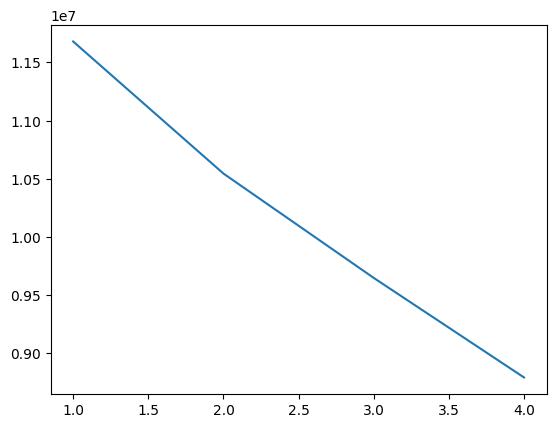

In [386]:
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [387]:
# Choosing K by comparing Cost against each K
cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11678917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10544471.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9648093.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8792937.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7989517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7232156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6541250.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

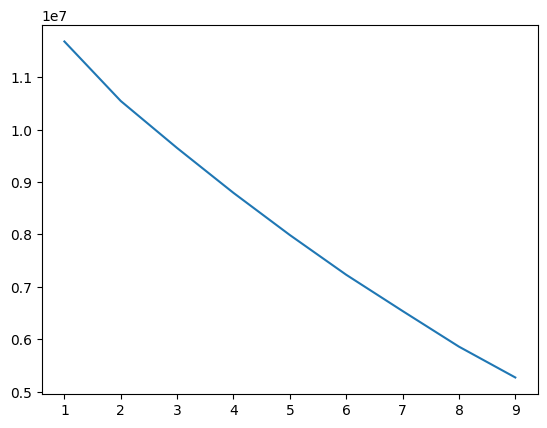

In [389]:
# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)